# Excercise 1
### Review of data wrangling and visualization in Python

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

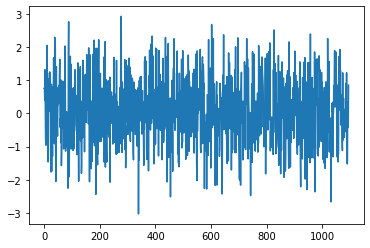

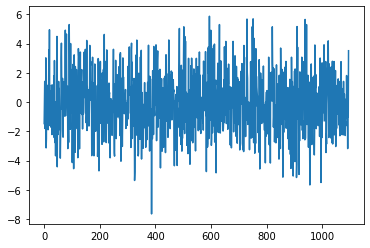

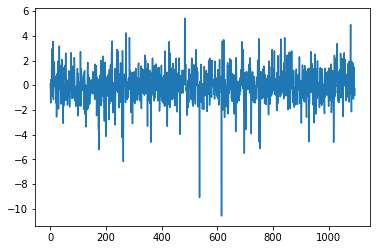

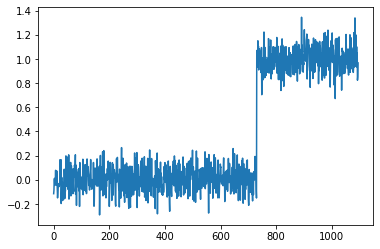

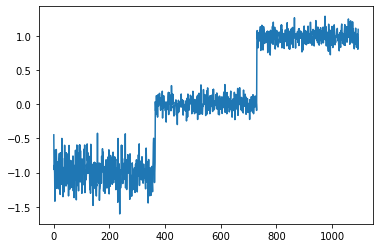

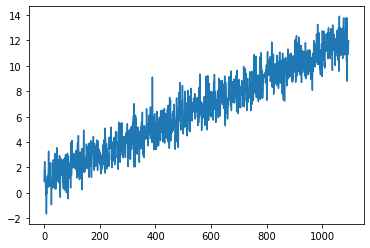

In [5]:
df = pd.read_csv('Data1.csv', sep=',',header = 0)
Time_series = df.values[:, 0]
df.columns = ['index', 'theta_1', 'theta_2', 'theta_3',	'theta_4',	'theta_5',	'theta_6']
for i in range(len(df.values[0]) - 1):
    plt.figure(i)
    plt.plot(df.values[:, i + 1])
    plt.show()

<Figure size 432x288 with 0 Axes>

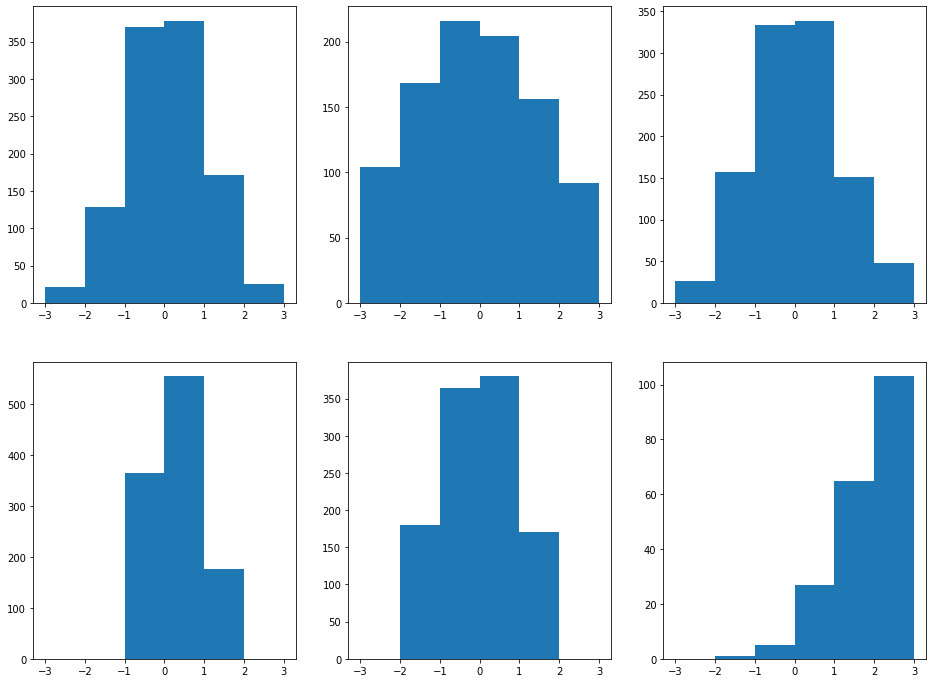

In [6]:
plt.figure(1)
fig, axis = plt.subplots(2, 3, figsize = (16, 12))
axis[0, 0].hist(df.values[:, 1], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[0, 1].hist(df.values[:, 2], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[0, 2].hist(df.values[:, 3], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[1, 0].hist(df.values[:, 4], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[1, 1].hist(df.values[:, 5], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[1, 2].hist(df.values[:, 6], bins = [-3, -2, -1, 0, 1, 2, 3])
plt.show()

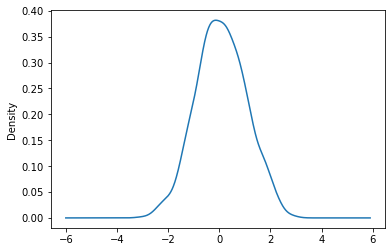

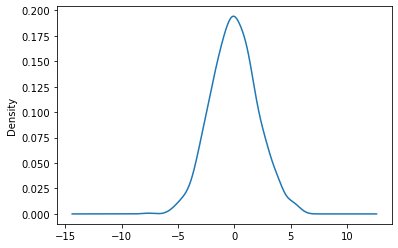

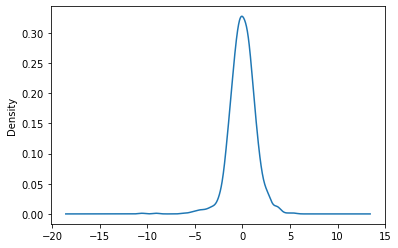

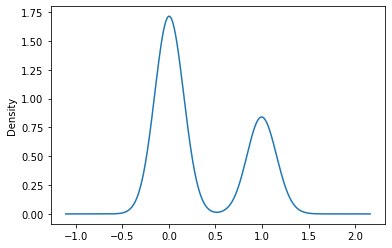

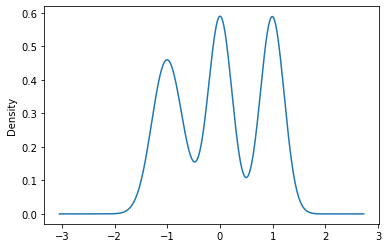

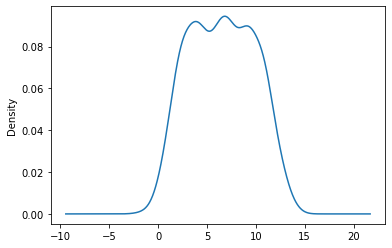

In [59]:
for i in range(len(df.values[0]) - 1):
    plt.figure(i)
    s = pd.Series(df.values[:, i + 1])
    s.plot.kde()

In [72]:
mask = (df.values[:, 0] >= '2018-01-01') & (df.values[:, 0] <= '2018-12-31')
df2 = df.loc[mask]
df2 = df2[['theta_1', 'theta_2', 'theta_3',	'theta_4']]
df2

,theta_1,theta_2,theta_3,theta_4
365,0.682693,-3.091767,-0.475717,-0.238530
366,-0.283107,-0.979955,1.233933,0.158031
367,1.572221,-2.033528,2.196317,0.041347
368,-1.042981,0.651530,1.060125,0.064832
369,-1.392614,-2.570905,-0.600063,-0.015025
...,...,...,...,...
725,0.473556,-0.651265,-0.523058,0.076798
726,1.433117,0.325632,0.905920,0.028891
727,0.285428,-0.476290,1.082404,0.111482
728,2.249273,-1.233575,-0.666277,-0.080878


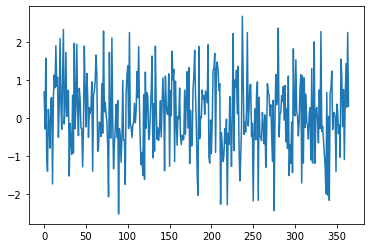

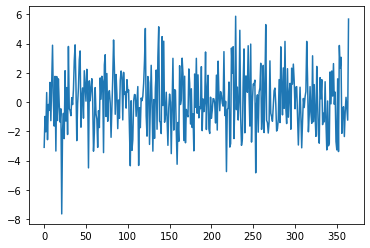

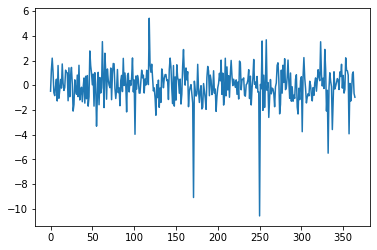

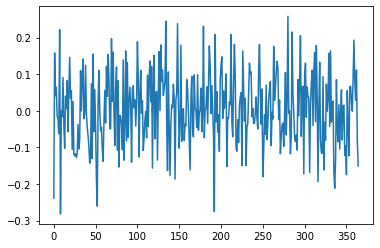

In [73]:
for i in range(len(df2.values[0])):
    plt.figure(i)
    plt.plot (df2.values[:, i])
    plt.show

(array([  0.,   0., 179., 186.,   0.,   0.]),
 array([-3, -2, -1,  0,  1,  2,  3]),
 <BarContainer object of 6 artists>)

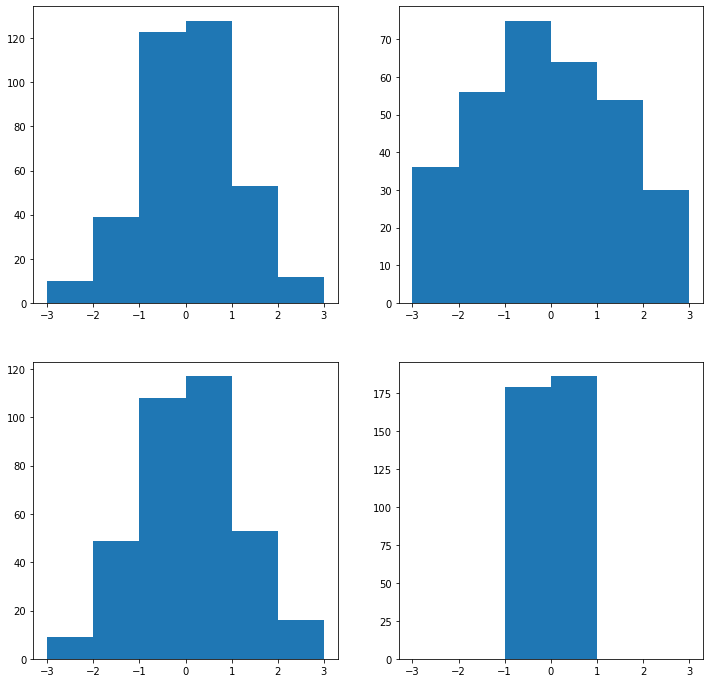

In [79]:
fig, axis = plt.subplots(2, 2, figsize = (12, 12))
axis[0, 0].hist(df2.values[:, 0], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[0, 1].hist(df2.values[:, 1], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[1, 0].hist(df2.values[:, 2], bins = [-3, -2, -1, 0, 1, 2, 3])
axis[1, 1].hist(df2.values[:, 3], bins = [-3, -2, -1, 0, 1, 2, 3])

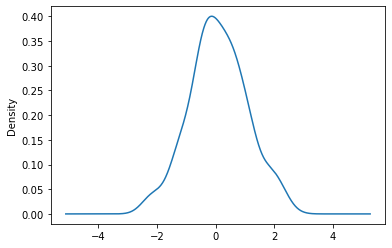

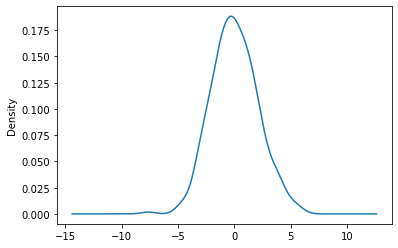

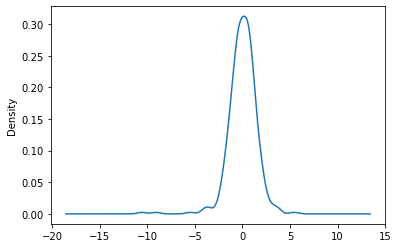

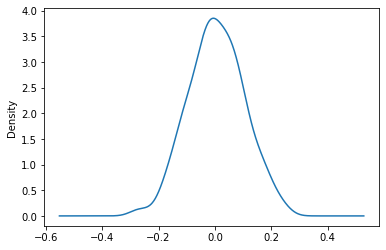

In [82]:
for i in range(len(df2.values[0])):
    plt.figure(i)
    s = pd.Series(df2.values[:, i])
    s.plot.kde()

# Excercise 2
### Installation of cmdstanpy

In [21]:
from cmdstanpy import cmdstan_path, CmdStanModel
import statistics

In [13]:
stan_file = r'C:\Studia\Data-Analytics\Lab-1\bern_1.stan'
model = CmdStanModel(stan_file=stan_file)

# First name: Maciej (6)
# Last name: Wojtyś (6)

data_file = {
    "N" : 12,
    "y" : [1,1,1,0,0,0,0,0,0,1,1,1]
}
fit = model.sample(data=data_file)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


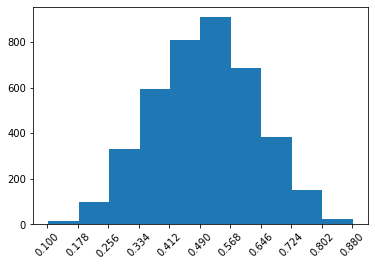

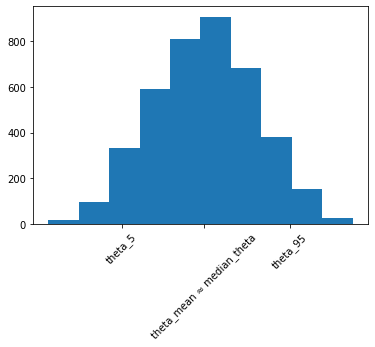

In [73]:
fit.draws().shape
fit.draws(concat_chains=True).shape
draws_theta = fit.stan_variable(var='theta')
median_theta = statistics.median(draws_theta)
fit.summary()
theta_5 = fit.summary().loc["theta", "5%"]
theta_95 = fit.summary().loc["theta", "95%"]
theta_mean = fit.summary().loc["theta", "Mean"]

plt.figure(1)
x1 = np.linspace(0.1, 0.88, 11)
xticks = ['theta_mean', 'median_theta', 'theta_5', 'theta_95']
plt.xticks(x1, rotation = 45)
plt.hist(draws_theta)
plt.show()

plt.figure(2)
x2 = np.array([theta_mean, theta_5, theta_95])
xticks = ['theta_mean ≈ median_theta', 'theta_5', 'theta_95']
plt.xticks(x2, xticks, rotation = 45)
plt.hist(draws_theta)
plt.show()